In [61]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [63]:

import matplotlib.pyplot as plt

In [64]:
Model_Name = 'full_conv4_1'

In [65]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

In [66]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [67]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [68]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:1.6170754432678223


In [69]:
print(predict_batch.shape)

(32, 100, 100)


In [70]:
import numpy as np

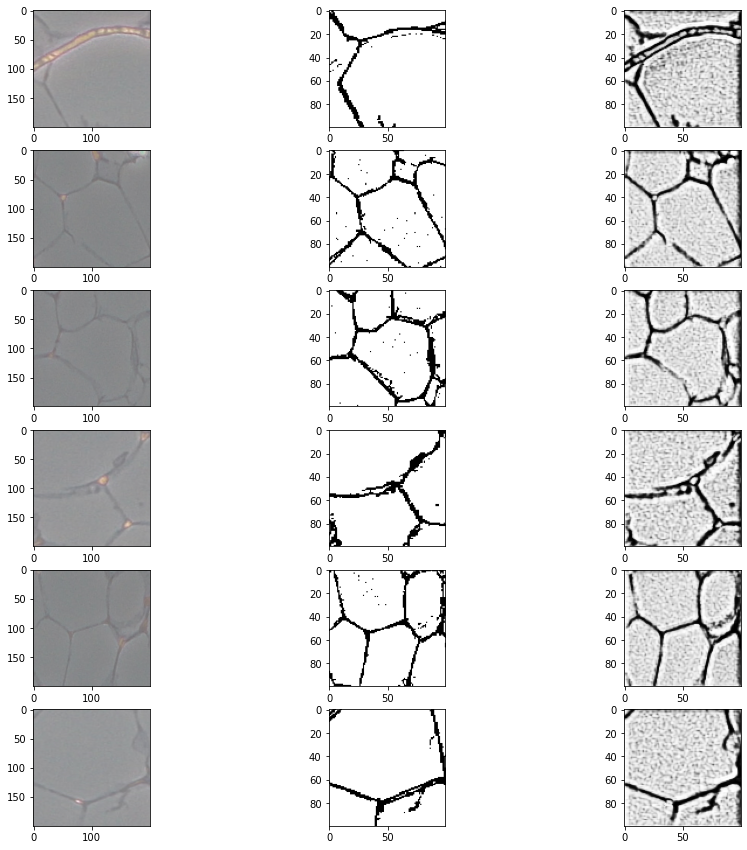

In [71]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [72]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.06477168 0.04185215 0.08419105 0.18462044 0.45925802 0.78695047
 0.83920753 0.7803279  0.6561076  0.5201307  0.4601676  0.40115985
 0.44860744 0.5295067  0.59066117 0.5710491  0.50524884 0.4894425
 0.49646002 0.49975586 0.5230549  0.5767804  0.6269239  0.64321727
 0.629433   0.64946747 0.63669205 0.5491571  0.45986438 0.4007494
 0.42620218 0.44999683 0.4392061  0.3877483  0.4006321  0.5126926
 0.5089102  0.62119627 0.7490872  0.690246   0.5669778  0.3851434
 0.33014718 0.5483107  0.70140636 0.77424216 0.710126   0.55724305
 0.5274382  0.49078473 0.4896255  0.43854472 0.34059486 0.4426365
 0.6454552  0.72865176 0.6737285  0.53193885 0.44113123 0.40768707
 0.4834655  0.56457865 0.6629056  0.7288448  0.7627777  0.7040584
 0.5538673  0.50646937 0.6218854  0.74687815 0.7581526  0.67415774
 0.5383765  0.49511734 0.56505877 0.59231293 0.53278977 0.45386693
 0.43554136 0.4510847  0.4883444  0.5826098  0.63849723 0.574156
 0.4393865  0.43944663 0.51805854 0.544317   0.5418937  0.5

In [73]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.6039216  0.6        0.5921569 ]
 [0.6313726  0.627451   0.62352943]
 [0.6392157  0.63529414 0.6313726 ]
 [0.6392157  0.6392157  0.6313726 ]
 [0.6392157  0.6392157  0.6313726 ]
 [0.63529414 0.63529414 0.62352943]
 [0.62352943 0.62352943 0.6156863 ]
 [0.6156863  0.6156863  0.60784316]
 [0.6039216  0.60784316 0.6       ]
 [0.6        0.6039216  0.5921569 ]
 [0.59607846 0.6        0.5882353 ]
 [0.59607846 0.6        0.59607846]
 [0.6        0.6        0.59607846]
 [0.6        0.6        0.59607846]
 [0.59607846 0.59607846 0.5921569 ]
 [0.6        0.6        0.6       ]
 [0.6039216  0.6039216  0.6039216 ]
 [0.60784316 0.60784316 0.60784316]
 [0.60784316 0.60784316 0.6117647 ]
 [0.6        0.6        0.60784316]
 [0.6        0.6        0.60784316]
 [0.6039216  0.6039216  0.60784316]
 [0.6117647  0.6117647  0.6156863 ]
 [0.6039216  0.6039216  0.6039216 ]
 [0.60784316 0.6        0.6039216 ]
 [0.60784316 0.6        0.6039216 ]
 [0.60784316 0.6        0.6039216 ]
 [0.6039216  0.59607846 0.6 